In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import sqrtm


In [11]:
def co_var(s,t,h):
    return (np.abs(t) ** (2 * h) + np.abs(s) ** (2 * h) - np.abs(t - s) ** (2 * h)) / 2.0

def generate_frac_bm(T, H, N, nPaths):
    """
    T = Time in yrs default to 1.0
    N = TimeStep
    H = Hurst param
    """
    ts = np.linspace(0.00, T, N + 1)
    n = ts.size
    i, j = np.meshgrid(ts, ts, indexing="xy")
    auto_corr = co_var(i,j,H)

    sqrt_auto_corr = sqrtm(auto_corr)
    frac_bm_paths = []

    for _ in range(nPaths):
        v = np.random.randn(n)
        u = sqrt_auto_corr @ v
        frac_bm_paths.append(u)
        plt.plot(u, "k", linewidth=2)

    plt.title(f"Fractional BM paths (H = {H})")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()

    return frac_bm_paths


C:\Users\jayma\AppData\Local\Temp\ipykernel_67148\2255562816.py:15: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_auto_corr = sqrtm(auto_corr)


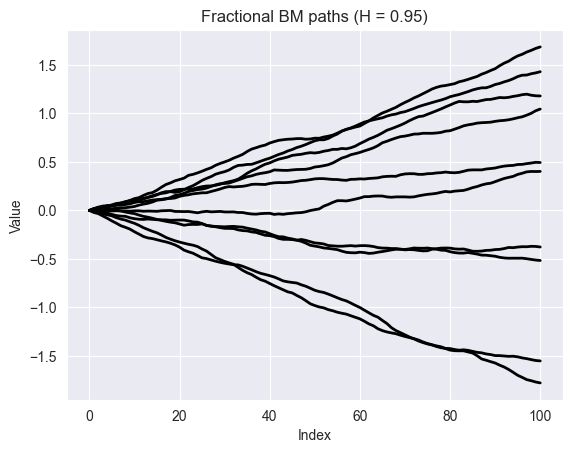

[array([0.        , 0.01720773, 0.03421502, 0.04510893, 0.04873501,
        0.04911228, 0.05782648, 0.07561602, 0.08992011, 0.10151908,
        0.10981217, 0.11708205, 0.12500107, 0.1331624 , 0.14387673,
        0.16042645, 0.18238223, 0.19403036, 0.19362362, 0.18608745,
        0.19308386, 0.2129725 , 0.2364345 , 0.25542654, 0.28129197,
        0.30933578, 0.33046628, 0.34894481, 0.37348502, 0.38776572,
        0.39957779, 0.41716202, 0.44448412, 0.464012  , 0.46728929,
        0.47416976, 0.47570026, 0.49099614, 0.50737854, 0.52458628,
        0.53853303, 0.55823496, 0.57717379, 0.59219132, 0.61291478,
        0.62837801, 0.64838139, 0.66236699, 0.67962483, 0.69930488,
        0.71807146, 0.72904479, 0.72865066, 0.74244659, 0.76786244,
        0.78798426, 0.81795777, 0.83543802, 0.85115203, 0.86997516,
        0.89106205, 0.91123631, 0.92372353, 0.93483372, 0.94550789,
        0.95550079, 0.97331679, 0.98599049, 0.99402388, 1.00961869,
        1.01860478, 1.03485972, 1.05194743, 1.07

In [12]:
generate_frac_bm(1.0, 0.95, 100, 10)

C:\Users\jayma\AppData\Local\Temp\ipykernel_67148\2255562816.py:15: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_auto_corr = sqrtm(auto_corr)


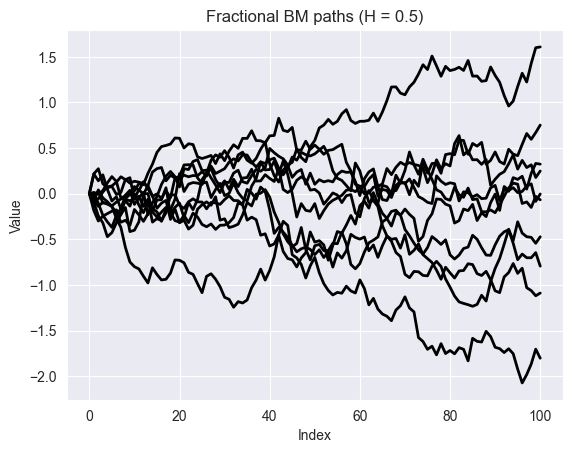

In [13]:
fBm = generate_frac_bm(1.0, 0.5, 100, 10)

C:\Users\jayma\AppData\Local\Temp\ipykernel_67148\2255562816.py:15: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_auto_corr = sqrtm(auto_corr)


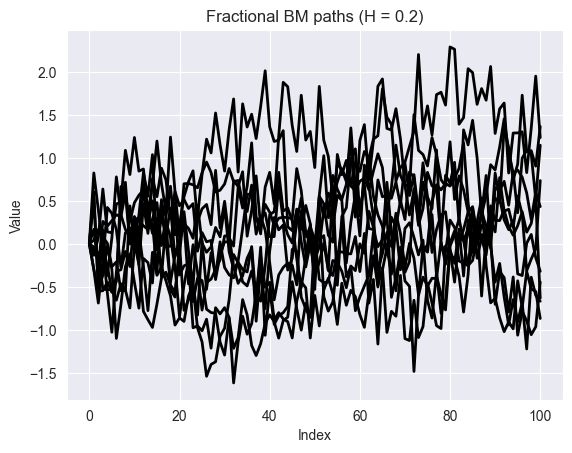

In [14]:
fBm = generate_frac_bm(1.0, 0.2, 100, 10)

# Heston Model Using Fractional BM

In [15]:
def generate_heston_model(S, T, r, kappa, theta, V_0, rho, xi, steps, number_of_iterations, Hurst=0.4):
  dt = T/steps
  size = (number_of_iterations, steps)
  prices = np.zeros(size)
  sigmas = np.zeros(size)
  S_t = np.full(number_of_iterations, S, dtype=float)
  V_t = np.full(number_of_iterations, V_0, dtype=float)
  #covariance = np.array([[1, rho], [rho, 1]])
  W_t  = np.array(generate_frac_bm(T, Hurst, steps, number_of_iterations))  # (nPaths, steps+1)
  W_t1 = np.array(generate_frac_bm(T, Hurst, steps, number_of_iterations))
  db1 = np.diff(W_t)
  db2 = np.diff(W_t1)
  for i in range(steps):
    #W_t = np.random.multivariate_normal(np.array([0, 0]), covariance, size=number_of_iterations)

    S_t = S_t + r * S_t * dt + np.sqrt(V_t) * S_t * np.sqrt(dt) * db1[:,i]
    V_t = np.abs(V_t + kappa * (theta - V_t) * dt + xi * np.sqrt(V_t) * np.sqrt(dt) * db2[:,i])
    prices[:,i] = S_t
    sigmas[:,i] = V_t

  return prices, sigmas

C:\Users\jayma\AppData\Local\Temp\ipykernel_67148\2255562816.py:15: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_auto_corr = sqrtm(auto_corr)


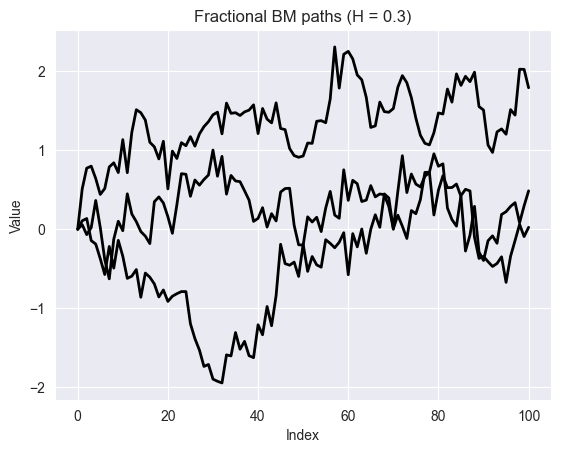

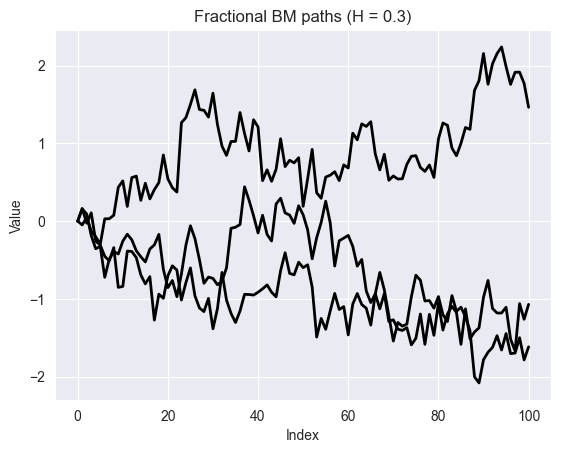

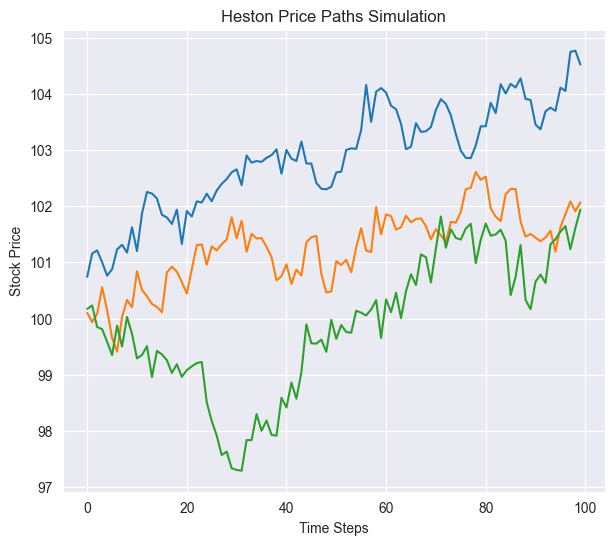

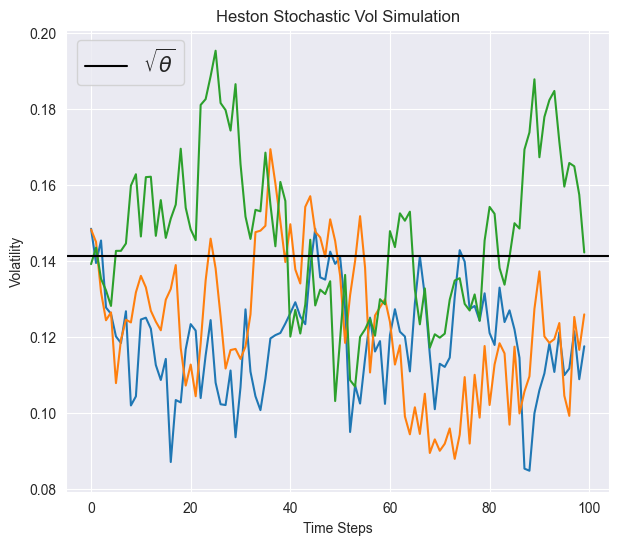

In [17]:
kappa =4
theta = 0.02
V_0 =  0.02
xi = 0.9
r = 0.02
S = 100
paths =3
steps = 100
T = 1
rho=-0.8
prices, sigmas = generate_heston_model(S, T, r, kappa, theta, V_0, rho, xi, steps, paths, 0.3)

plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigmas).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()

C:\Users\jayma\AppData\Local\Temp\ipykernel_67148\2255562816.py:15: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_auto_corr = sqrtm(auto_corr)


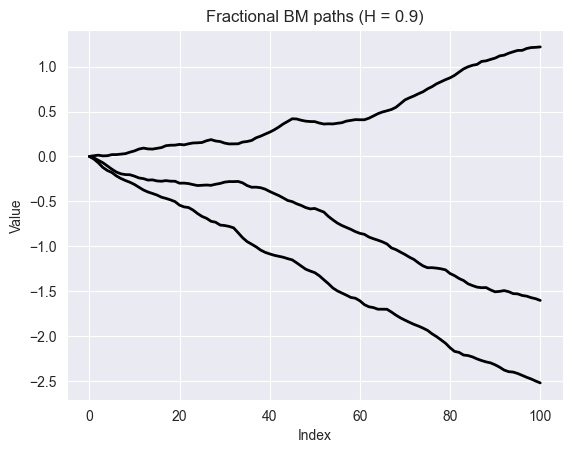

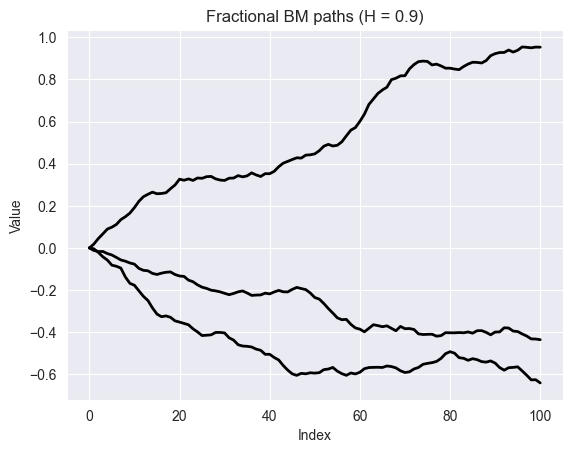

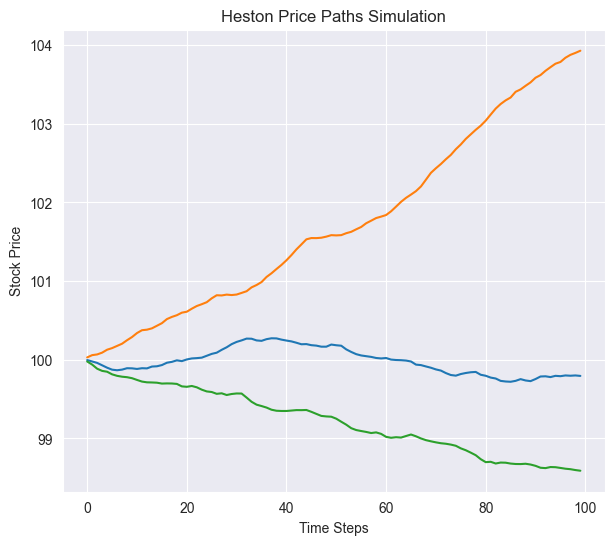

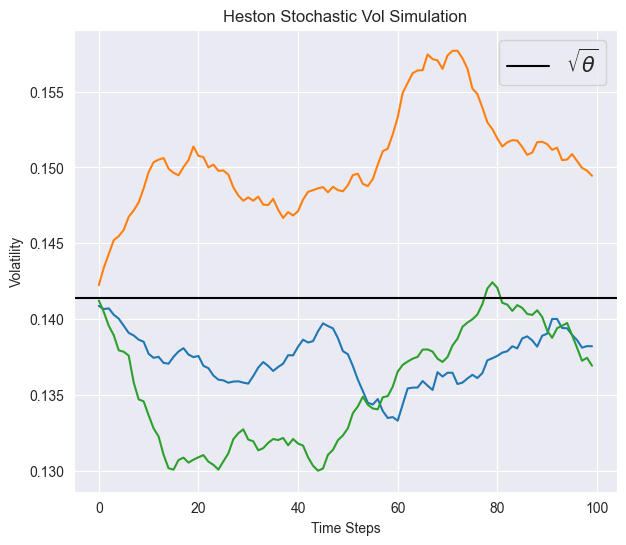

In [18]:
kappa =4
theta = 0.02
V_0 =  0.02
xi = 0.9
r = 0.02
S = 100
paths =3
steps = 100
T = 1
rho=-0.8
prices, sigmas = generate_heston_model(S, T, r, kappa, theta, V_0, rho, xi, steps, paths, 0.9)

plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigmas).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()

# Davis Harte fBM


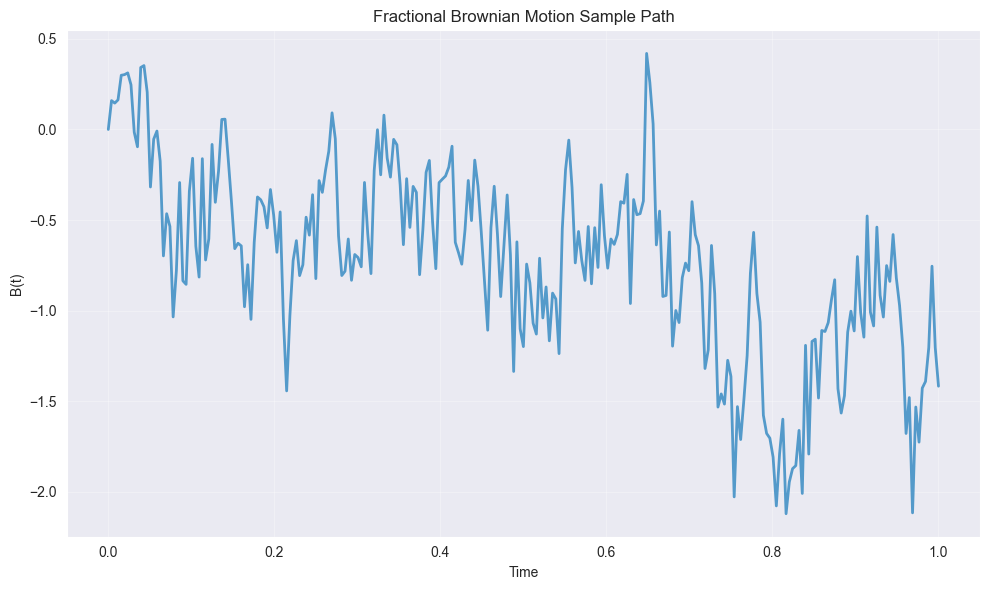

In [9]:
def davies_hart_fbm(N, H, T=1):
    # Time grid
    t = np.linspace(0, T, N+1)

    # Autocovariance function
    gamma = lambda k: 0.5 * (abs(k + 1)**(2 * H) - 2 * abs(k)**(2 * H) + abs(k - 1)**(2 * H))

    # Circulant vector
    c = np.concatenate([np.array([gamma(k) for k in range(N+1)]), np.array([gamma(k) for k in range(N-1, 0, -1)])])

    # Real eigenvalues
    L = np.fft.fft(c).real
    if not np.allclose(np.fft.fft(c).imag, 0, atol=1e-10):
        raise ValueError("FFT has significant imaginary components, check input vector.")

    if np.any(L < 0):
        raise ValueError("Negative eigenvalues encountered — invalid circulant embedding.")

    # FFT Length
    M = 2 * N

    # Generate standard normals
    Z = np.zeros(M, dtype=np.complex128)

    # Real parts
    Z[0] = np.sqrt(L[0]) * np.random.normal()
    Z[N] = np.sqrt(L[N]) * np.random.normal()

    # For 1 ≤ k < N
    X = np.random.normal(0, 1, N - 1)
    Y = np.random.normal(0, 1, N - 1)

    for k in range(1, N):
        Z[k] = np.sqrt(L[k] / 2) * (X[k-1] + 1j * Y[k-1])
        Z[M - k] = np.conj(Z[k])

    # Inverse FFT to recover fGn
    fGn = np.fft.ifft(Z).real[:N] * np.sqrt(M) * (T / N) ** H

    # Cumsum for fBm
    fbm = np.concatenate([np.array([0]), np.cumsum(fGn)])

    # Return the time grid, fractional Gaussian noise, and fractional Brownian motion
    return t, fGn, fbm

fbm = davies_hart_fbm(256, .2, 1)
plt.figure(figsize=(10, 6))
plt.plot(fbm[0], fbm[2], linewidth=2, color='#2E86C1', alpha=0.8)
plt.title('Fractional Brownian Motion Sample Path', fontsize=12)
plt.xlabel('Time', fontsize=10)
plt.ylabel('B(t)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()